In [2]:
from pathlib import Path

import nshutils as nu
from jmp.lightning_datamodule import MPTrjAlexOMAT24DataModuleConfig

data_config = MPTrjAlexOMAT24DataModuleConfig.draft()
data_config.batch_size = 1
data_config.num_workers = 0
data_config.salex.local_path = Path("/storage/nima/salex-ocp/hf/")
data_config.omat24.local_path = Path("/storage/nima/omat24/hf/")

data_config.mptrj.enabled = False
data_config.salex.enabled = False
data_config.omat24.enabled = False

data_config.with_linear_reference_("mptrj-salex")
data_config = data_config.finalize()
nu.display(data_config)

In [3]:
import numpy as np
from jmp.lightning_datamodule import MPTrjAlexOMAT24DataModule
from tqdm.auto import tqdm


def get(name, num_samples: int = 10_000):
    data_config_ = data_config.model_copy()
    getattr(data_config_, name).enabled = True

    dm = MPTrjAlexOMAT24DataModule(data_config_)
    dm.prepare_data()
    dm.setup("fit")

    dl = dm.train_dataloader()

    values = []
    for i, batch in tqdm(enumerate(dl), total=num_samples):
        if i >= num_samples:
            break

        values.append(batch.y.cpu().numpy())

    values = np.concatenate(values, axis=0)
    return values


mptrj_energies = get("mptrj")
salex_energies = get("salex")
omat24_energies = get("omat24")

print(mptrj_energies.shape, salex_energies.shape, omat24_energies.shape)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(10000,) (10000,) (10000,)


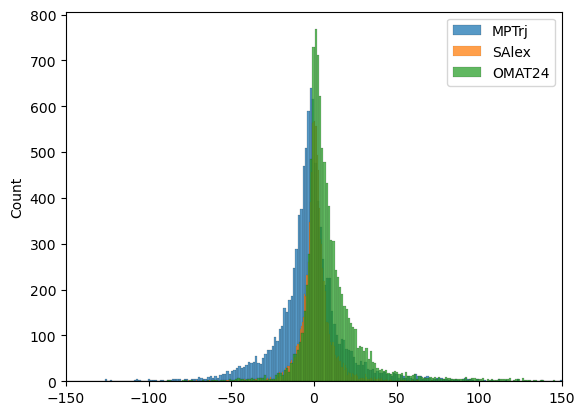

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(mptrj_energies, ax=ax, label="MPTrj")
sns.histplot(salex_energies, ax=ax, label="SAlex")
sns.histplot(omat24_energies, ax=ax, label="OMAT24")
ax.set_xlim(-150, 150)
ax.legend()
plt.show()

In [8]:
def get_nolinref(name, num_samples: int = 10_000):
    data_config_ = data_config.model_copy()
    getattr(data_config_, name).enabled = True
    data_config_.reference = None

    dm = MPTrjAlexOMAT24DataModule(data_config_)
    dm.prepare_data()
    dm.setup("fit")

    dl = dm.train_dataloader()

    values = []
    for i, batch in tqdm(enumerate(dl), total=num_samples):
        if i >= num_samples:
            break

        values.append(batch.y.cpu().numpy())

    values = np.concatenate(values, axis=0)
    return values


mptrj_total_energies = get("mptrj")
salex_total_energies = get("salex")
omat24_total_energies = get("omat24")

print(
    mptrj_total_energies.shape, salex_total_energies.shape, omat24_total_energies.shape
)

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(10000,) (10000,) (10000,)


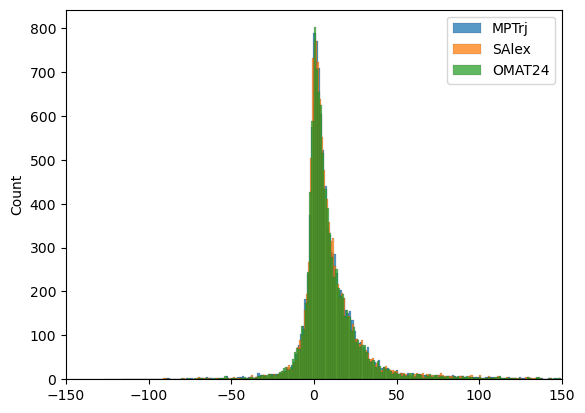

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(mptrj_total_energies, ax=ax, label="MPTrj")
sns.histplot(salex_total_energies, ax=ax, label="SAlex")
sns.histplot(omat24_total_energies, ax=ax, label="OMAT24")
ax.set_xlim(-150, 150)
ax.legend()
plt.show()

In [10]:
def get_nolinref_peratom(name, num_samples: int = 10_000):
    data_config_ = data_config.model_copy()
    getattr(data_config_, name).enabled = True
    data_config_.reference = None

    dm = MPTrjAlexOMAT24DataModule(data_config_)
    dm.prepare_data()
    dm.setup("fit")

    dl = dm.train_dataloader()

    values = []
    for i, batch in tqdm(enumerate(dl), total=num_samples):
        if i >= num_samples:
            break

        values.append((batch.y / batch.natoms.float()).cpu().numpy())

    values = np.concatenate(values, axis=0)
    return values


mptrj_peratom_energies = get("mptrj")
salex_peratom_energies = get("salex")
omat24_peratom_energies = get("omat24")

print(
    mptrj_peratom_energies.shape,
    salex_peratom_energies.shape,
    omat24_peratom_energies.shape,
)

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(10000,) (10000,) (10000,)


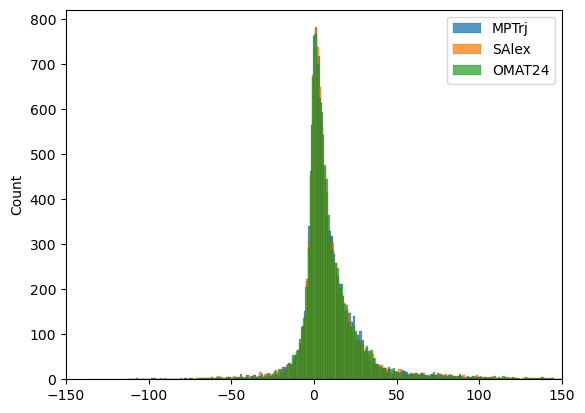

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(mptrj_peratom_energies, ax=ax, label="MPTrj")
sns.histplot(salex_peratom_energies, ax=ax, label="SAlex")
sns.histplot(omat24_peratom_energies, ax=ax, label="OMAT24")
ax.set_xlim(-150, 150)
ax.legend()
plt.show()

In [22]:
import plotly.graph_objects as go

# Assuming mptrj_peratom_energies, salex_peratom_energies, and omat24_peratom_energies are already defined

# Create traces for each dataset
trace1 = go.Histogram(x=mptrj_peratom_energies, name="MPTrj", opacity=0.75)
trace2 = go.Histogram(x=salex_peratom_energies, name="SAlex", opacity=0.75)
trace3 = go.Histogram(x=omat24_peratom_energies, name="OMAT24", opacity=0.75)

# Create the layout
layout = go.Layout(
    title="Distribution of Per-Atom Energies",
    xaxis=dict(title="Energy", range=[-150, 150]),
    yaxis=dict(title="Count"),
    barmode="overlay",
    legend=dict(
        x=1, y=1, bgcolor="rgba(255, 255, 255, 0.5)", bordercolor="rgba(0, 0, 0, 0.1)"
    ),
    template="plotly_white",
)

# Create the figure and add the traces
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Update the layout for better appearance
fig.update_layout(
    font=dict(family="Arial", size=14),
    plot_bgcolor="rgba(240, 240, 240, 0.95)",
    hovermode="closest",
)

# Show the plot
fig.show()

In [35]:
import plotly.graph_objects as go


def plot_energy_histograms(
    data_dict,
    x_range=(-150, 150),
    nbins=50,
    opacity=0.75,
    title="Distribution of Per-Atom Energies",
):
    """
    Create an interactive histogram plot using Plotly.

    Parameters:
    data_dict (dict): A dictionary where keys are labels and values are lists of energy data.
    x_range (tuple): The range for the x-axis (default: (-150, 150)).
    nbins (int): Number of bins for the histogram (default: 50).
    opacity (float): Opacity of the histogram bars (default: 0.75).
    title (str): Title of the plot.

    Returns:
    plotly.graph_objects.Figure: The created figure object.
    """

    traces = []
    for label, energies in data_dict.items():
        trace = go.Histogram(
            x=energies,
            name=label,
            opacity=opacity,
            nbinsx=nbins,
            histnorm="probability",  # Use raw counts instead of density
        )
        traces.append(trace)

    layout = go.Layout(
        title=title,
        xaxis=dict(title="Energy", range=x_range),
        yaxis=dict(title="Count"),
        barmode="overlay",
        legend=dict(
            x=1,
            y=1,
            bgcolor="rgba(255, 255, 255, 0.5)",
            bordercolor="rgba(0, 0, 0, 0.1)",
        ),
        template="plotly_white",
    )

    fig = go.Figure(data=traces, layout=layout)

    fig.update_layout(
        font=dict(family="Arial", size=14),
        plot_bgcolor="rgba(240, 240, 240, 0.95)",
        hovermode="closest",
    )

    return fig


fig = plot_energy_histograms(
    {
        "MPTrj": mptrj_peratom_energies,
        "SAlex": salex_peratom_energies,
        "OMAT24": omat24_peratom_energies,
    },
    x_range=(-150, 150),
    nbins=None,
)
fig.show()